In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve
import sympy as sym
import math
from IPython.display import display
pd.options.display.float_format = '{:,.2f}'.format
from numpy.linalg import inv

In [2]:
df = pd.read_csv("data.csv")

## Dataset provided:

In [3]:
print(df)

    T(deg C)   x1   y1
0      72.50 0.00 0.00
1      67.02 0.05 0.17
2      64.40 0.10 0.32
3      60.23 0.20 0.53
4      56.65 0.30 0.68
5      53.34 0.40 0.80
6      50.40 0.50 0.86
7      48.12 0.60 0.92
8      46.05 0.70 0.95
9      44.15 0.80 0.98
10     42.50 0.90 0.99
11     41.90 0.95 1.00
12     41.20 1.00 1.00


In [4]:
df['T(K)']=df['T(deg C)']+273.15
print(df)

    T(deg C)   x1   y1   T(K)
0      72.50 0.00 0.00 345.65
1      67.02 0.05 0.17 340.17
2      64.40 0.10 0.32 337.55
3      60.23 0.20 0.53 333.38
4      56.65 0.30 0.68 329.80
5      53.34 0.40 0.80 326.49
6      50.40 0.50 0.86 323.55
7      48.12 0.60 0.92 321.27
8      46.05 0.70 0.95 319.20
9      44.15 0.80 0.98 317.30
10     42.50 0.90 0.99 315.65
11     41.90 0.95 1.00 315.05
12     41.20 1.00 1.00 314.35


## Values provide:
<ol>
<li>$g_{12}$ -$g_{22}$ =$A_{12}$= 764.6865 $cal/mol$</li>
<li>$g_{21}$ -$g_{11}$ =$A_{12}$= -226.3497 $cal/mol$</li>
<li>R= 1.98721 $cal/mol K$</li>
<li>$\alpha_{12}$= $\alpha_{21}$= $\alpha$= 0.2993</li>
</ol>

## Calculation of $\tau_{12}$ and $\tau_{21}$ using $Y_{1}^\infty$ and $Y_{2}^\infty$

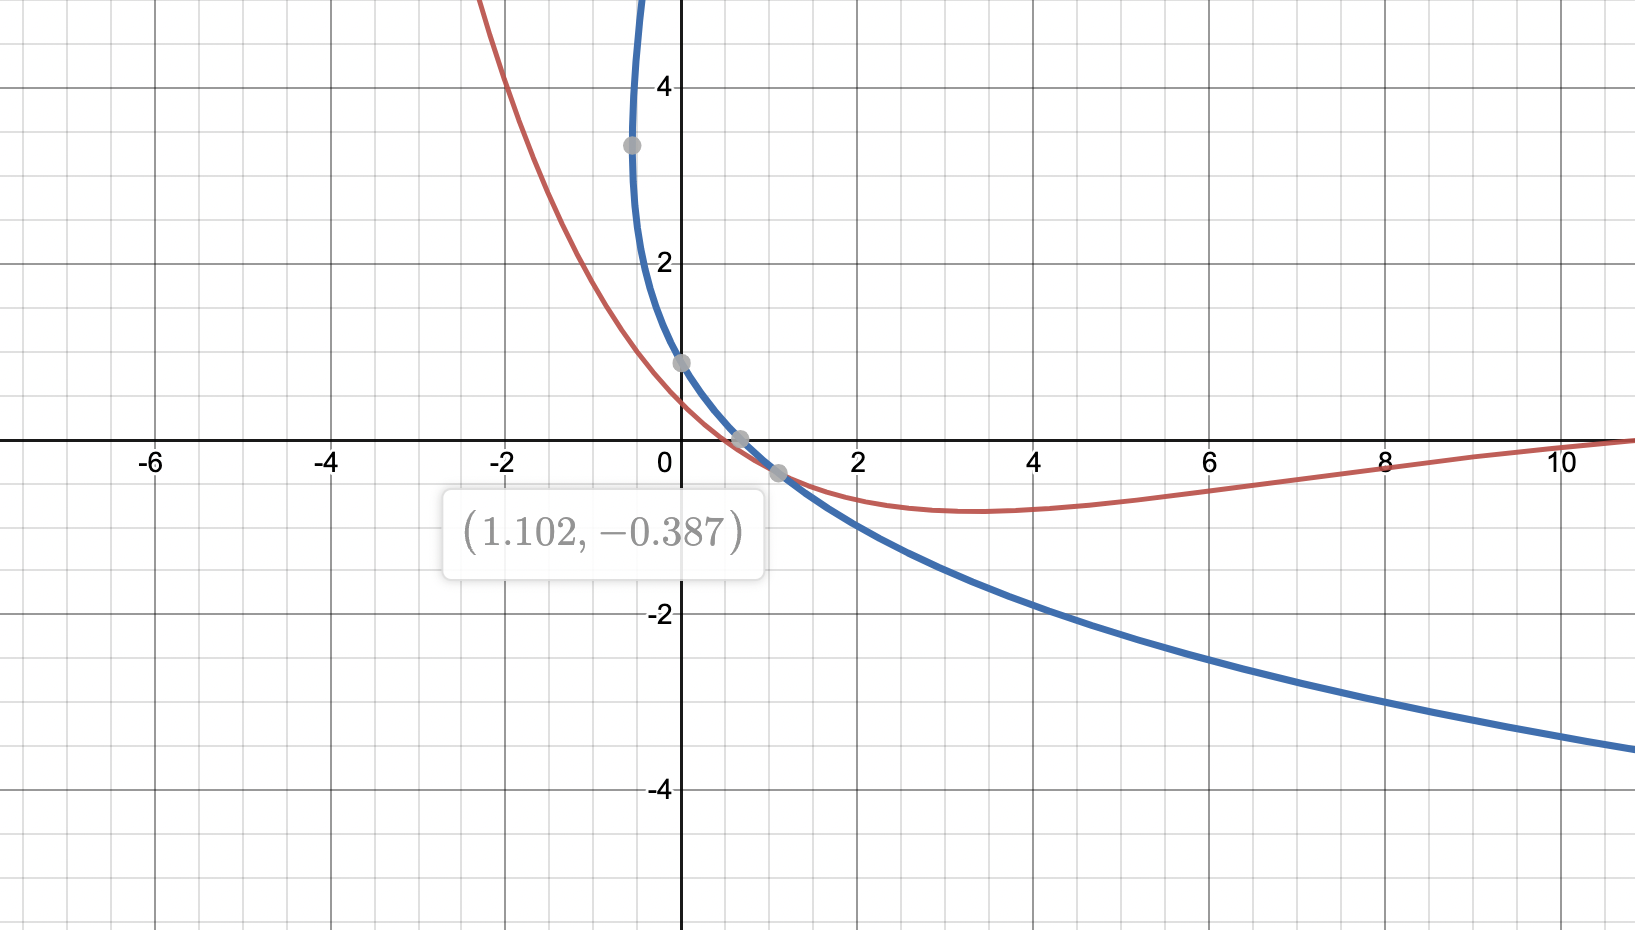

$\tau_{12}$= 1.102<br>
$\tau_{21}$= -0.387

## Defining all the required functions
### Keys:
<ol>
<li>T12= $\tau_{12}$</li>
<li>T21= $\tau_{21}$</li>
<li>Y1= $\gamma_{1}$</li>
<li>Y2= $\gamma_{2}$</li>
<li>Pb_0= Saturated pressure by 1-Butanol</li>
<li>Pm_0= Saturated pressure by Methacrylic Acid</li>
<li>Notation: 1-> 1-Butanol and 2-> Methacrylic Acid</li>
<li>P_= Total pressure, given as 20mmHg</li>
</ol>

In [5]:
def T12(T):
    return 764.6865/(1.98721*T)

def T21(T):
    return -226.3497/(1.98721*T)

def G12(T):
    return sym.exp(-1*0.2993*T12(T))

def G21(T):
    return sym.exp(-1*0.2993*T21(T))

def Y1(x1,T):
    return sym.exp((1-x1)**2*(T21(T)*(G21(T)/(x1+(1-x1)*G21(T)))**2 + T12(T)*G12(T)/(1-x1+x1*G12(T))**2))

def Y2(x1,T):
    return sym.exp(x1**2*(T12(T)*(G12(T)/(1-x1+x1*G12(T)))**2 + T21(T)*G21(T)/(x1+(1-x1)*G21(T))**2))

def Pb_0(T):
    T-=273.15
    return 10**(7.838-1558.19/(T+196.881))

def Pm_0(T):
    T-=273.15
    return 10**(8.97637-2621.47/(T+268.934))

## Solver function:
<ol>
<li>x is fixed as given in the dataset and T is started at 300K</li>
<li>Corresponding y1 and y2 are calculated for a given x and T during each iteration</li>
<li>Depending upon y1 + y2, T is altered during each iteration</li>
</ol>

In [6]:
def solve(P_, x):
    n=0
    tol=0.01
    T=300
    y1=0
    while True:
        y1=(x*Y1(x,T)*Pb_0(T))/P_
        y2=((1-x)*Y2(1-x,T)*Pm_0(T))/P_
        if(y1+y2<1+tol and y1+y2>1-tol):
            break
        elif(y1+y2>1+tol):
            T-=0.01
        else:
            T+=0.01
        if(n>5000):
            break
        n+=1
    ans=np.array([y1,T])
    return ans

In [7]:
P_=20
y1_calc=[]
T_calc=[]
for i in range(13):
    ans=solve(P_,df.iloc[i][1])
    y1_calc.append(round(ans[0],3))
    T_calc.append(round(ans[1],3))

In [8]:
df['T_calc(K)']=pd.DataFrame(T_calc)
df['y_calc']=pd.DataFrame(y1_calc)
print(df)

    T(deg C)   x1   y1   T(K)  T_calc(K) y_calc
0      72.50 0.00 0.00 345.65     331.14      0
1      67.02 0.05 0.17 340.17     330.13  0.197
2      64.40 0.10 0.32 337.55     328.87  0.356
3      60.23 0.20 0.53 333.38     326.22  0.580
4      56.65 0.30 0.68 329.80     323.84  0.715
5      53.34 0.40 0.80 326.49     321.85  0.800
6      50.40 0.50 0.86 323.55     320.23  0.856
7      48.12 0.60 0.92 321.27     318.90  0.896
8      46.05 0.70 0.95 319.20     317.77  0.927
9      44.15 0.80 0.98 317.30     316.73  0.951
10     42.50 0.90 0.99 315.65     315.67  0.972
11     41.90 0.95 1.00 315.05     315.10  0.981
12     41.20 1.00 1.00 314.35     314.48  0.990


In [9]:
T= df['T(K)'].to_numpy()
T_calc=df['T_calc(K)'].to_numpy()
x1= df['x1'].to_numpy()
y1= df['y1'].to_numpy()
y_calc= df['y_calc'].to_numpy()

# Plots:
Note: Here x and y denotes x1 and y1

## 1.) Plots based on provided experimental data

### 1.a) T vs x,y

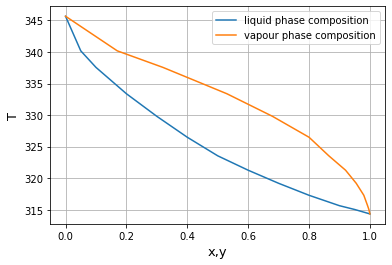

In [10]:
line1, = plt.plot(x1, T, label='liquid phase composition')
line2, = plt.plot(y1, T, label='vapour phase composition')
plt.legend(handles=[line1, line2], loc='best')
plt.xlabel("x,y", fontsize=13)
plt.ylabel("T",fontsize=13)
plt.grid()
# plt.savefig("1.pdf")
plt.show()

### 1.b) x vs y

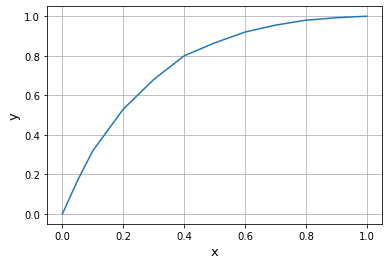

In [11]:
plt.plot(x1,y1)
plt.xlabel("x",fontsize=13)
plt.ylabel("y",fontsize=13)
plt.grid()
# plt.savefig("2.pdf")
plt.show()

## 2.) Plots based on calculated data

### 2.a) T vs x,y

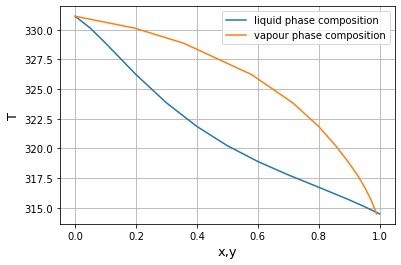

In [12]:
line1, = plt.plot(x1, T_calc, label='liquid phase composition')
line2, = plt.plot(y1_calc, T_calc, label='vapour phase composition')
plt.legend(handles=[line1, line2], loc='best')
plt.xlabel("x,y",fontsize=13)
plt.ylabel("T",fontsize=13)
# plt.savefig("3.pdf")
plt.grid()
plt.show()

### 2.b) x vs y

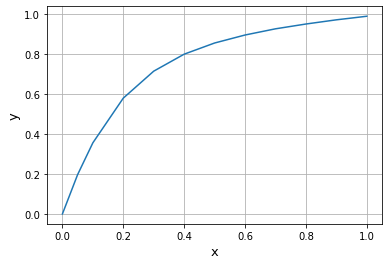

In [13]:
plt.plot(x1,y1_calc)
plt.xlabel("x",fontsize=13)
plt.ylabel("y",fontsize=13)
plt.grid()
# plt.savefig("4.pdf")
plt.show()

## 3.) Plots compairing provided experimental data and calculated data

### 3.a) T vs x,y

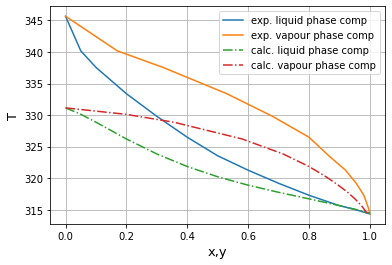

In [14]:
line1, = plt.plot(x1, T, label='exp. liquid phase comp')
line2, = plt.plot(y1, T, label='exp. vapour phase comp')
line3, = plt.plot(x1, T_calc,'-.', label='calc. liquid phase comp')
line4, = plt.plot(y1_calc, T_calc,'-.', label='calc. vapour phase comp')
plt.legend(handles=[line1, line2, line3, line4], loc='best')
plt.xlabel("x,y",fontsize=13)
plt.ylabel("T",fontsize=13)
# plt.savefig("5.pdf")
plt.grid()
plt.show()

### 3.b) x vs y

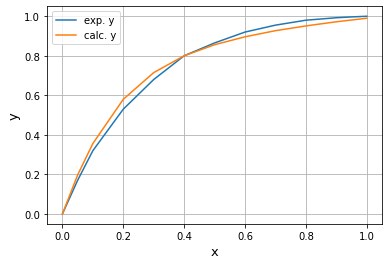

In [15]:
line1, = plt.plot(x1, y1, label='exp. y')
line2, = plt.plot(x1, y1_calc, label='calc. y')
plt.legend(handles=[line1, line2], loc='best')
plt.xlabel("x",fontsize=13)
plt.ylabel("y",fontsize=13)
plt.grid()
# plt.savefig("6.pdf")
plt.show()

## Calculation of Error using RMSE

### 1.) Error in vapour composition

In [17]:
err=0
for i in range(13):
    err+=abs(df.iloc[i][2]- df.iloc[i][5])**2
err/=13
err=pow(err,0.5)
print(err)

0.0259928782208389


### 2.) Error in Temperature

In [18]:
err=0
for i in range(13):
    err+=abs(df.iloc[i][3]- df.iloc[i][4])**2
err/=13
err=pow(err,0.5)
print(err)

6.288143911056236
